# Data Exploration and Preprocessing:

### Load the dataset

In [1]:
#importing libraries
import pandas as pd
from sklearn import preprocessing 
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,GridSearchCV
import joblib
from sklearn.metrics import f1_score
%matplotlib inline

In [ ]:
dataset =pd.read_csv('loan_default.csv')

## Examining the columns and their data types

In [ ]:
dataset.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
#getting whole dataset information:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [ ]:
#dropping the non required columns from the dataset
dataset=dataset.drop(['ID','Batch Enrolled','Grade','Sub Grade'],axis=1)


In [ ]:
#finding number of unique values in each column
print(dataset.nunique())

Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Interest Rate                   67448
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection Recovery Fee         67313
Collection 12 months Medical        2
Application Type                    2
Last week Pay                     162
Accounts Del

In [ ]:
#as Accounts Delinquent and payment plan have only singal value so we are going to drop them too
dataset=dataset.drop(['Accounts Delinquent','Payment Plan','Loan Title'],axis=1)

In [ ]:
dataset.apply(preprocessing.LabelEncoder().fit_transform)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,7094,22699,31227,2,31671,0,64573,0,15528,1,...,60456,25544,34487,0,0,49,30,51921,5050,0
1,1334,7866,30466,2,40163,2,6992,1,13140,0,...,28602,24372,45192,0,0,109,52,38407,16786,0
2,22610,5260,55535,2,42198,0,49264,1,46448,0,...,65254,42254,47758,0,0,66,33,23733,20266,0
3,8155,2937,50625,2,60232,0,55058,1,20856,1,...,34210,1074,31968,0,0,39,39,995,33921,0
4,13477,9079,37301,2,54089,0,10275,1,18242,1,...,65315,66115,11910,0,0,18,340,29936,17944,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,10305,2836,35598,2,17622,0,45259,2,46372,1,...,18776,65476,38781,0,0,69,47,38281,25081,1
67459,5526,6982,45221,2,21889,2,30172,1,19757,0,...,21674,20774,63492,0,0,14,36,4341,6971,0
67460,12516,23245,31228,2,65303,0,3988,2,3493,0,...,22519,51904,66155,0,0,137,16,37524,28963,0
67461,13170,1167,54920,2,45754,1,51497,0,1169,0,...,51706,11901,5714,0,0,73,60,54803,27512,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Employment Duration           67463 non-null  object 
 6   Home Ownership                67463 non-null  float64
 7   Verification Status           67463 non-null  object 
 8   Debit to Income               67463 non-null  float64
 9   Delinquency - two years       67463 non-null  int64  
 10  Inquires - six months         67463 non-null  int64  
 11  Open Account                  67463 non-null  int64  
 12  Public Record                 67463 non-null  int64  
 13  R

In [ ]:
map1={'MORTGAGE':0,'RENT':1,'OWN':2}
map2={'Not Verified':0,'Source Verified':1,'Verified':2}
map3={'w':0,'f':1}
map4={'INDIVIDUAL':0,'JOINT':1}
dataset['Employment Duration'] = dataset['Employment Duration'].map(map1)
dataset['Verification Status'] = dataset['Verification Status'].map(map2)
dataset['Initial List Status'] = dataset['Initial List Status'].map(map3)
dataset['Application Type'] = dataset['Application Type'].map(map4)

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Employment Duration           67463 non-null  int64  
 6   Home Ownership                67463 non-null  float64
 7   Verification Status           67463 non-null  int64  
 8   Debit to Income               67463 non-null  float64
 9   Delinquency - two years       67463 non-null  int64  
 10  Inquires - six months         67463 non-null  int64  
 11  Open Account                  67463 non-null  int64  
 12  Public Record                 67463 non-null  int64  
 13  R

In [ ]:
#target column analysis
dataset['Loan Status'].unique()

array([0, 1])

## Checking and handling missing values

In [ ]:
missing_info =dataset.isnull().sum()
print(missing_info)

Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Interest Rate                   0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Total Collection Amount         0
Total Current Balance           0
Total Revolving Credit Limit    0
Loan Status                     0
dtype: int64


In [ ]:
print('0 columns have missing values in the data.')

0 columns have missing values in the data.


## Checking of outliers and Removing Them:

In [ ]:
dataset.describe() #getting statistical information of the dataset

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,58.173814,11.846258,0.564369,80541.502522,1.025629,23.299241,0.327127,...,1.143969,59.691578,1.125141,0.021301,0.001823,71.163260,146.467990,1.595739e+05,23123.005544,0.092510
std,8367.865726,8150.992662,6785.345170,3.327441,3.718629,0.672501,45029.120366,0.713905,8.451824,0.800888,...,5.244365,357.026346,3.489885,0.144385,0.042661,43.315845,744.382233,1.390332e+05,20916.699999,0.289747
min,1014.000000,1014.000000,1114.590204,36.000000,5.320006,0.000000,14573.537170,0.000000,0.675299,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.000000,1.000000,6.170000e+02,1000.000000,0.000000
25%,10012.000000,9266.500000,9831.684984,58.000000,9.297147,0.000000,51689.843335,1.000000,16.756416,0.000000,...,0.021114,1.629818,0.476259,0.000000,0.000000,35.000000,24.000000,5.037900e+04,8155.500000,0.000000
50%,16073.000000,13042.000000,12793.682170,59.000000,11.377696,0.000000,69335.832680,1.000000,22.656658,0.000000,...,0.043398,3.344524,0.780141,0.000000,0.000000,68.000000,36.000000,1.183690e+05,16733.000000,0.000000
75%,22106.000000,21793.000000,17807.594120,59.000000,14.193533,1.000000,94623.322785,2.000000,30.048400,0.000000,...,0.071884,5.453727,1.070566,0.000000,0.000000,105.000000,46.000000,2.283750e+05,32146.500000,0.000000
max,35000.000000,34999.000000,34999.746430,59.000000,27.182348,2.000000,406561.536400,2.000000,39.629862,8.000000,...,42.618882,4354.467419,166.833000,1.000000,1.000000,161.000000,16421.000000,1.177412e+06,201169.000000,1.000000


In [ ]:
dataset.shape

(67463, 28)

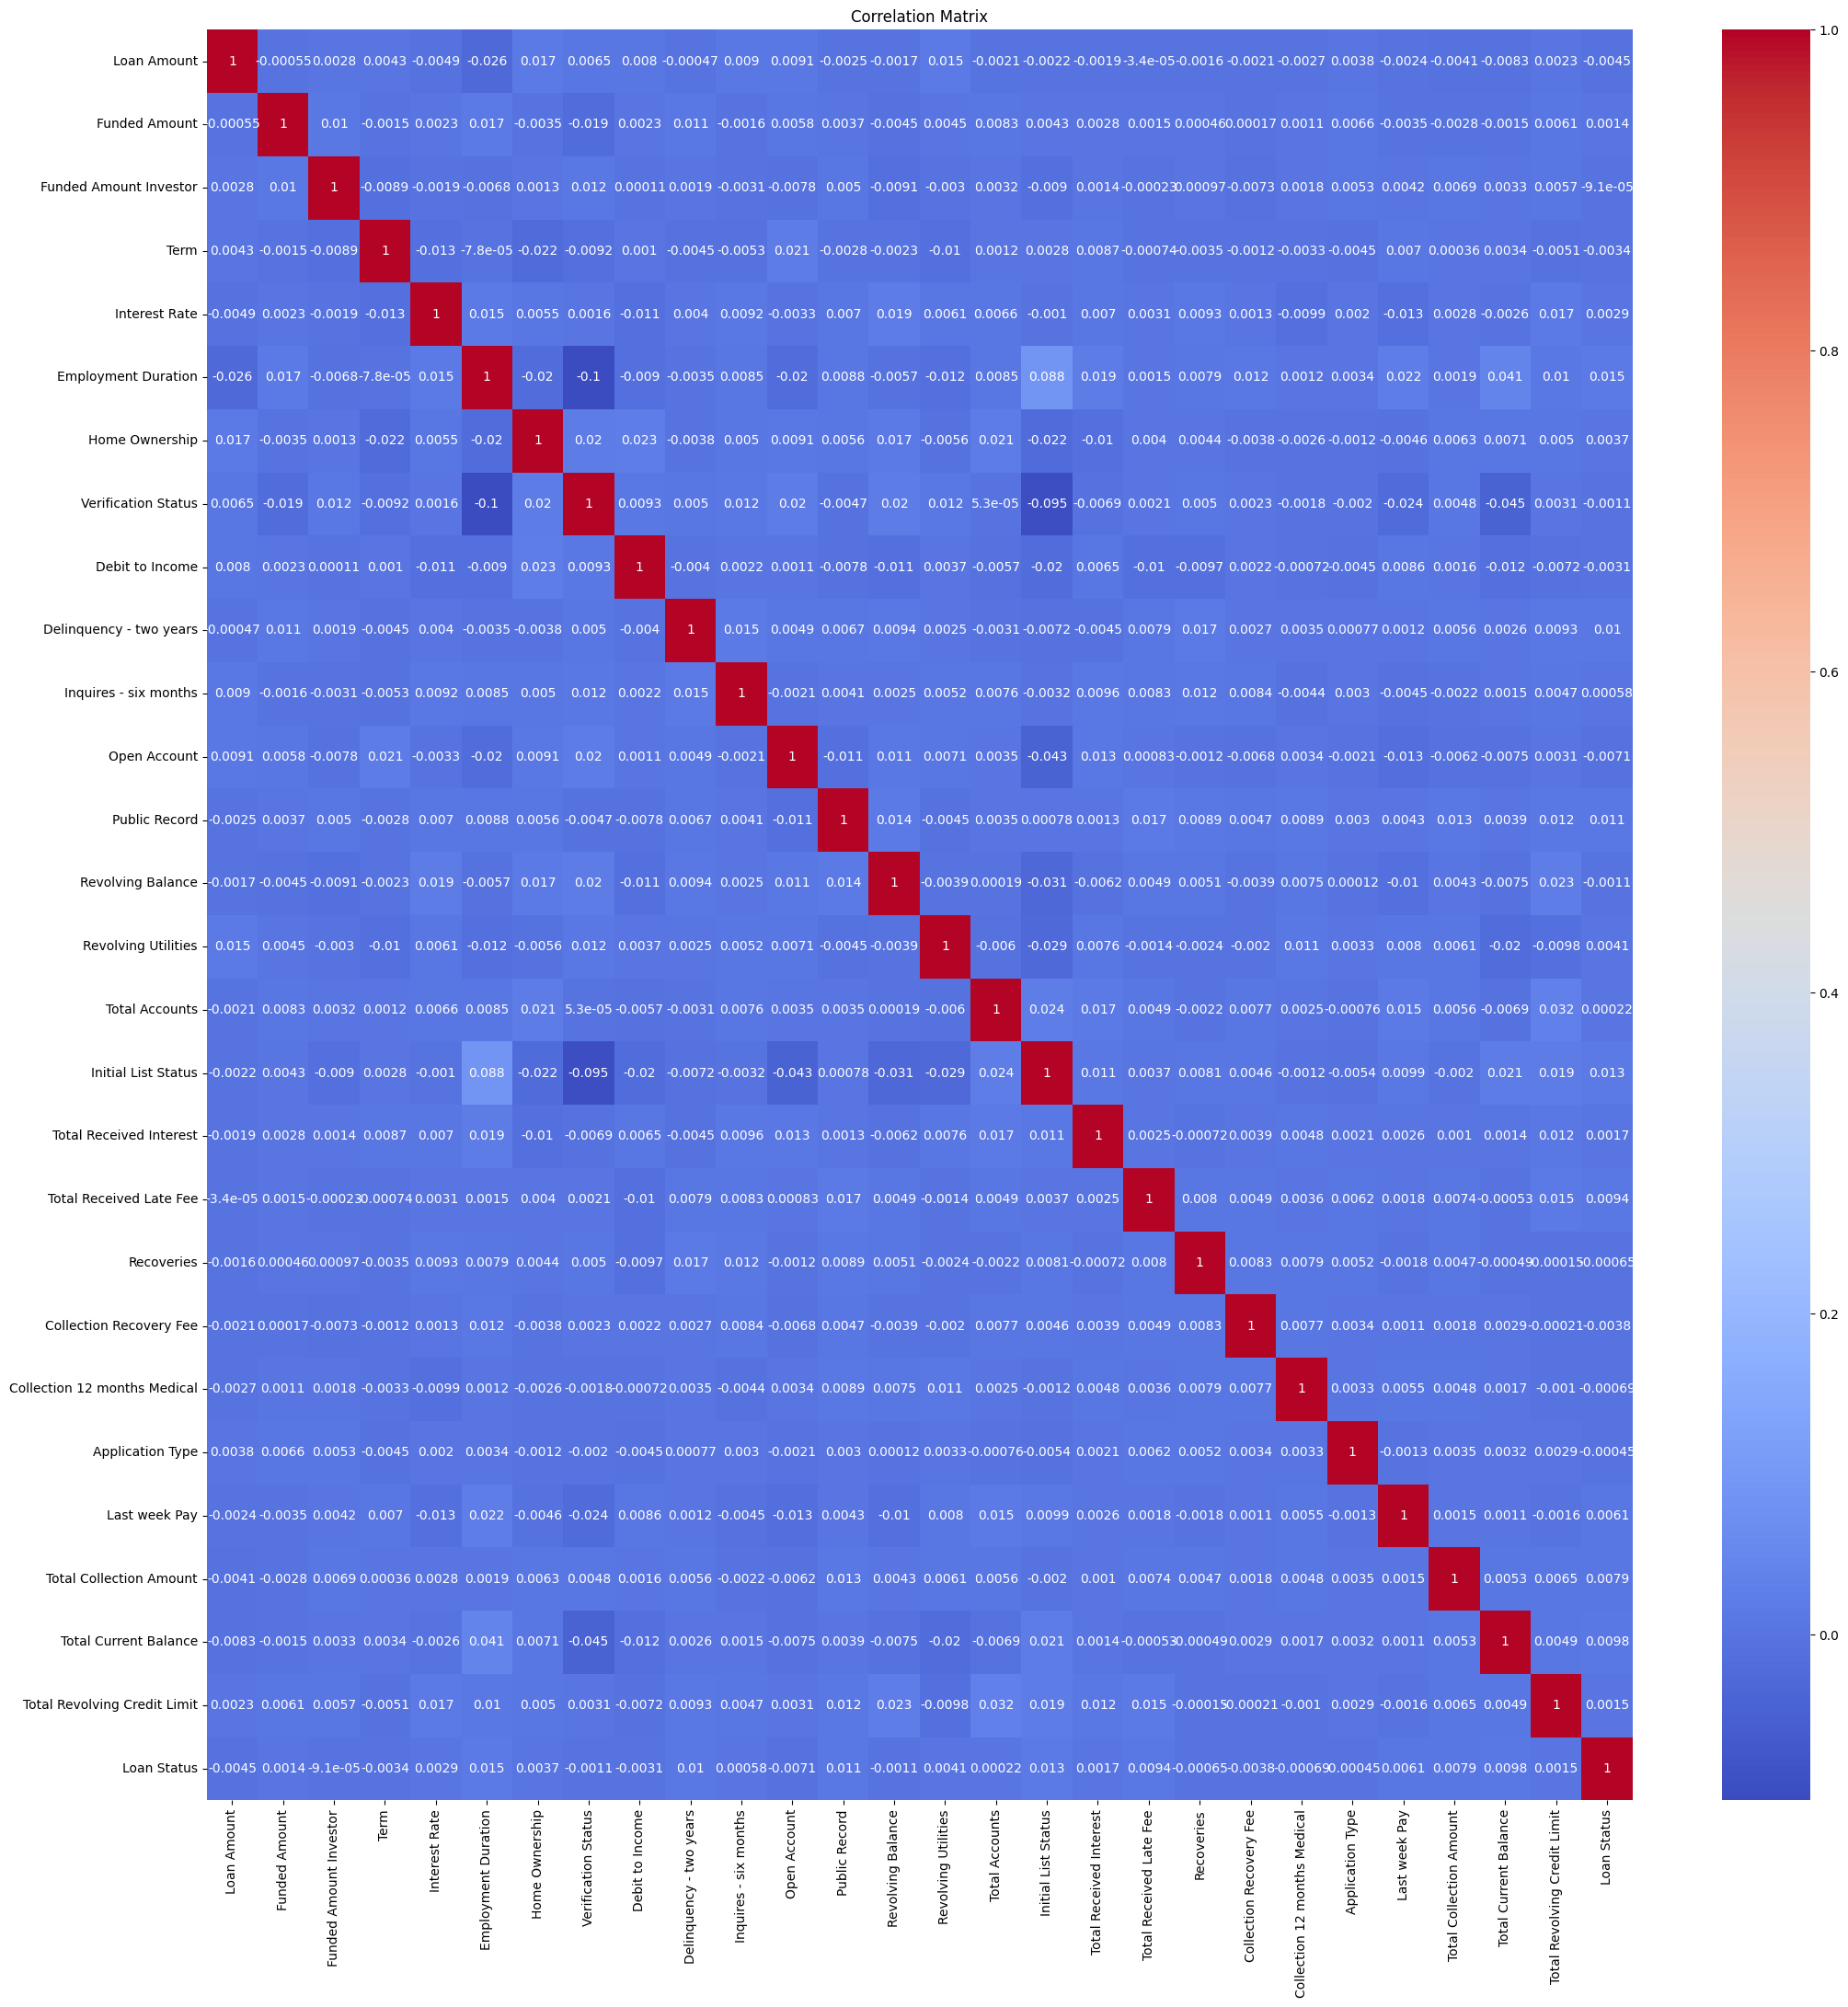

In [ ]:
#To Check Correlation of The Features with the Target Feature i.e. Loan Status
corr_matrix=dataset.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
best_features=corr_matrix.index[abs(corr_matrix['Loan Status'])>0.3]


Balancing the dataset

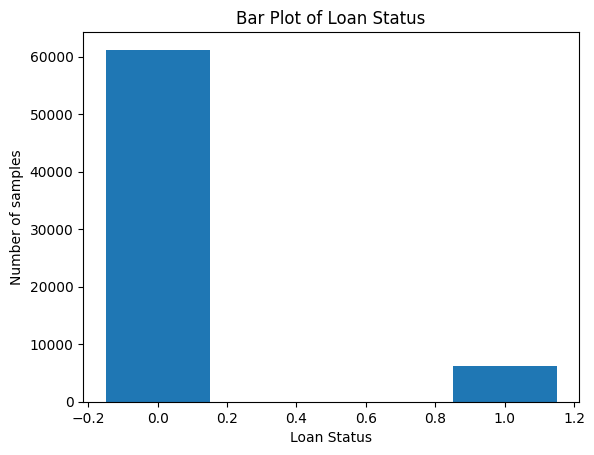

In [ ]:
#plotting the target variable
target = 'Loan Status'
class_counts = dataset[target].value_counts()
plt.bar([0,1], class_counts.values,width=0.3)
plt.title('Bar Plot of ' + target)
plt.xlabel(target)
plt.ylabel('Number of samples')
plt.show()

In [ ]:
# OVER-sample the majority class
majority_class = class_counts.idxmax()
n_samples = class_counts[majority_class]
over_sampled_dataset = dataset.groupby('Loan Status').apply(lambda x: x.sample(n_samples, replace=True)).reset_index(drop=True)

In [ ]:
print('Original dataset shape is',dataset.shape)
print('over sampled dataset shape is ',over_sampled_dataset.shape)

Original dataset shape is (67463, 28)
over sampled dataset shape is  (122444, 28)


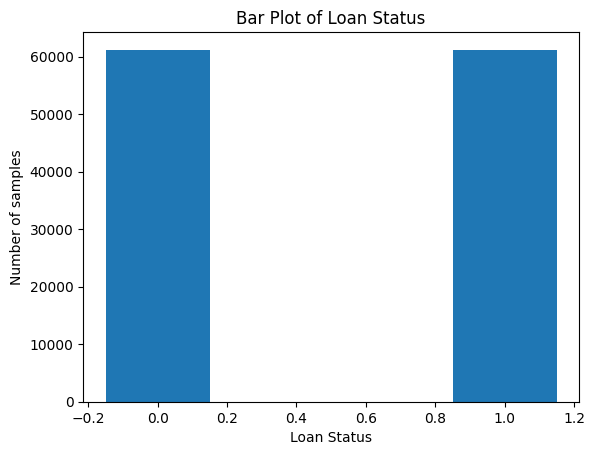

In [ ]:
class_counts = over_sampled_dataset[target].value_counts()
plt.bar([0,1], class_counts.values,width=0.3)
plt.title('Bar Plot of ' + target)
plt.xlabel(target)
plt.ylabel('Number of samples')
plt.show()

Distribution of Data

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


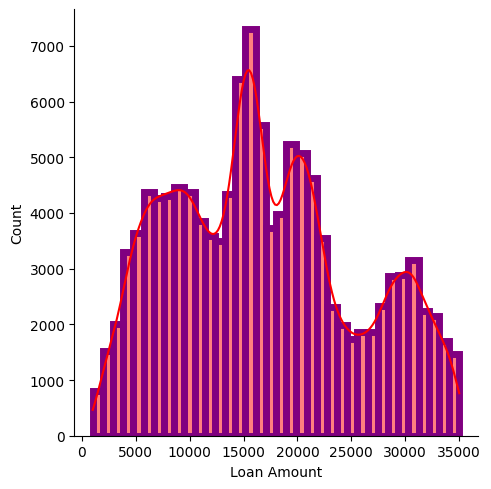

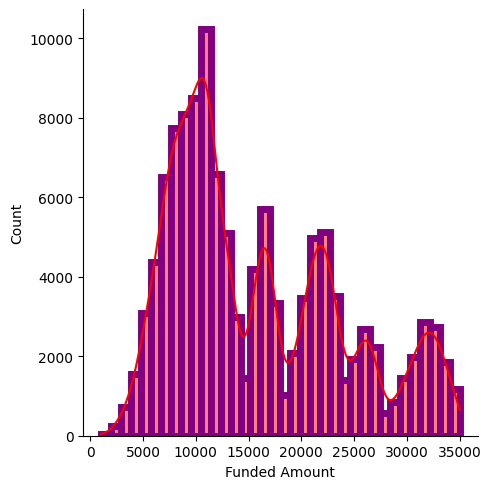

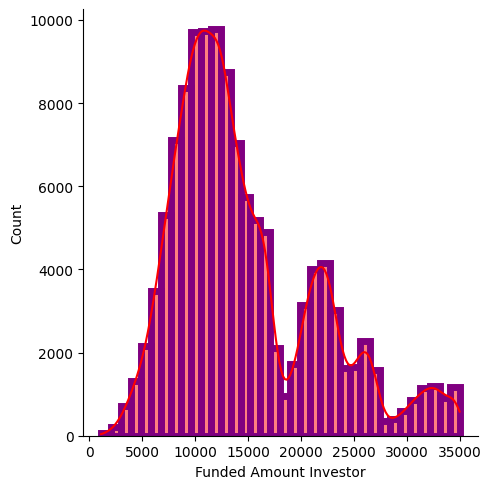

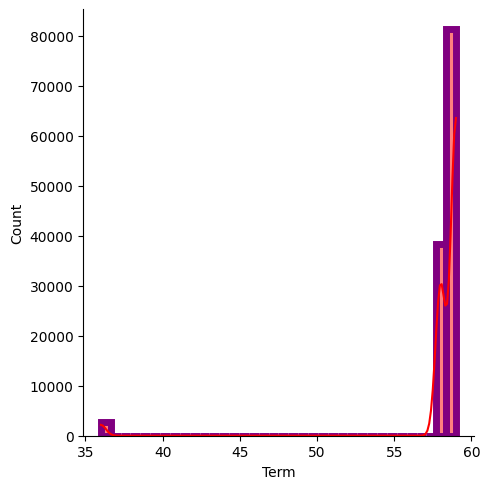

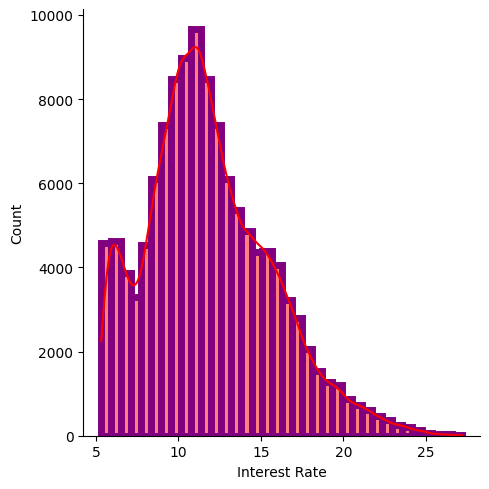

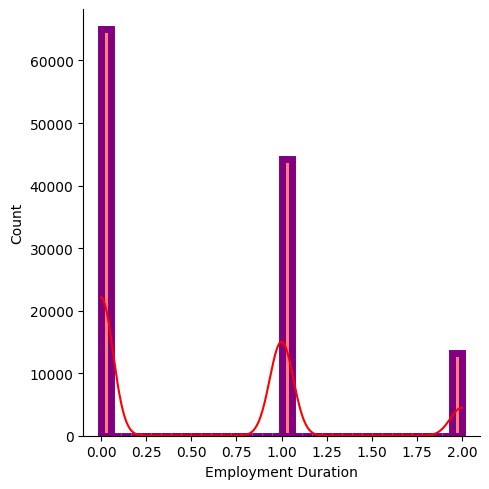

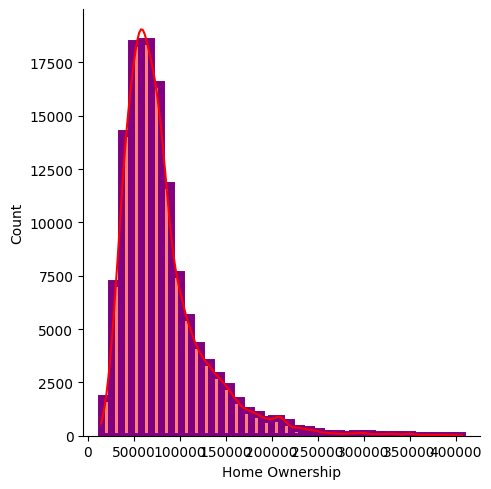

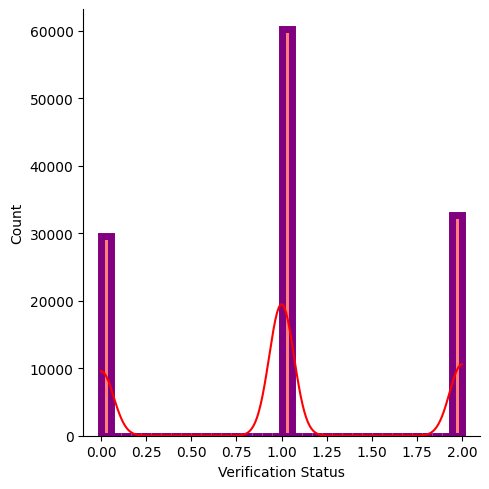

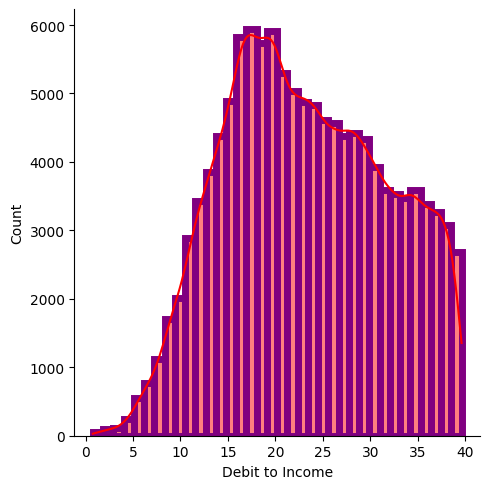

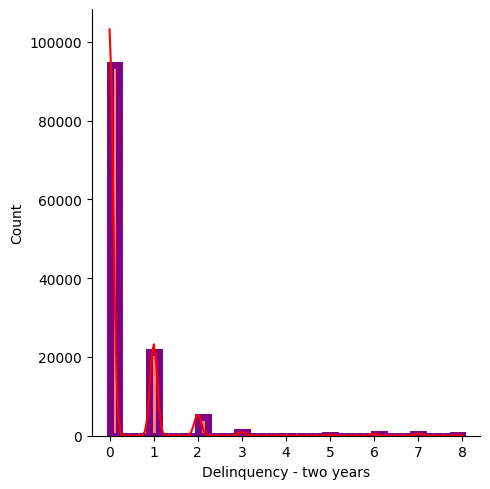

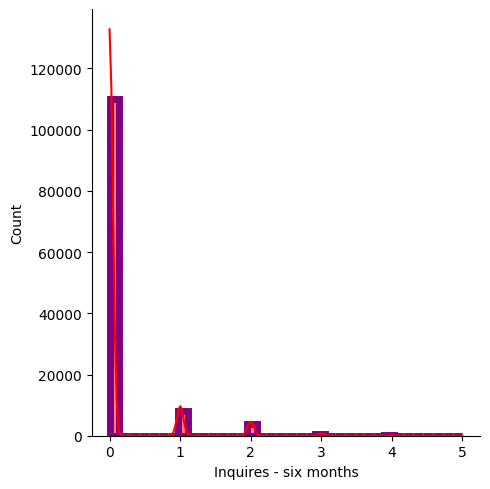

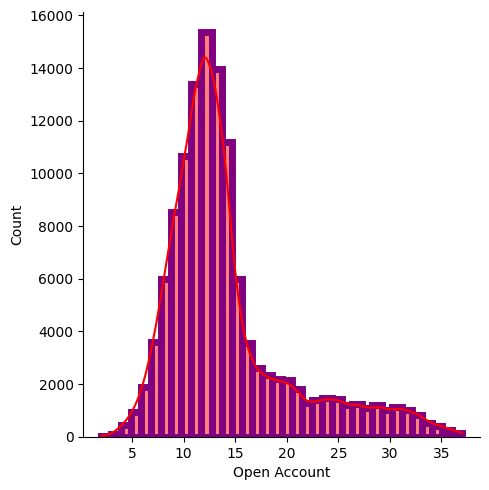

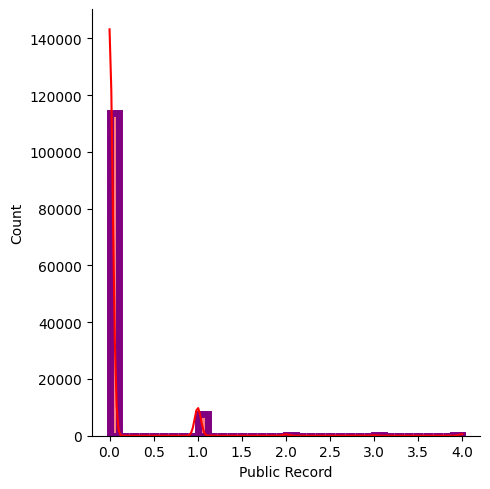

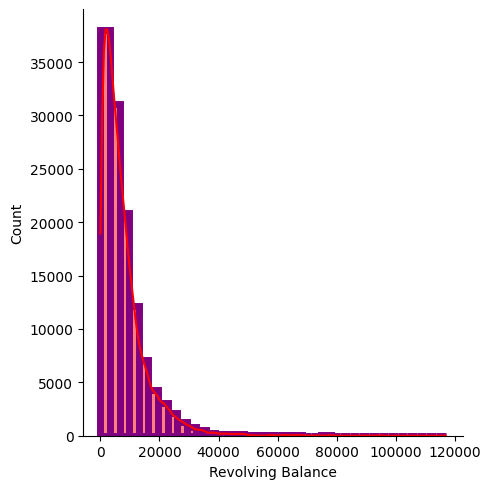

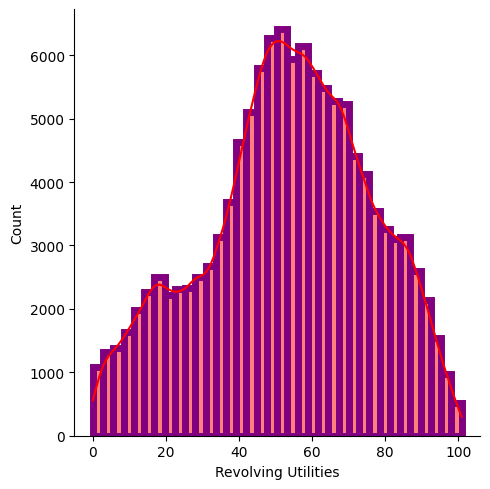

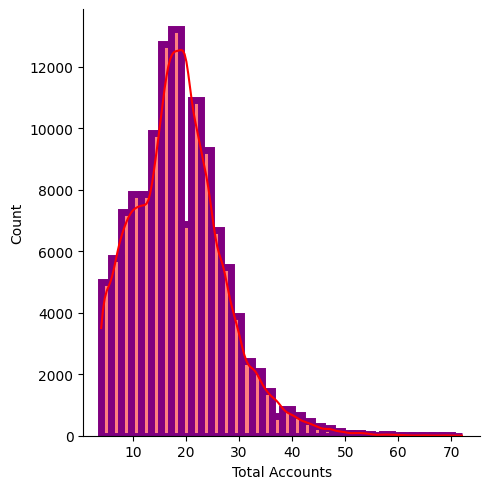

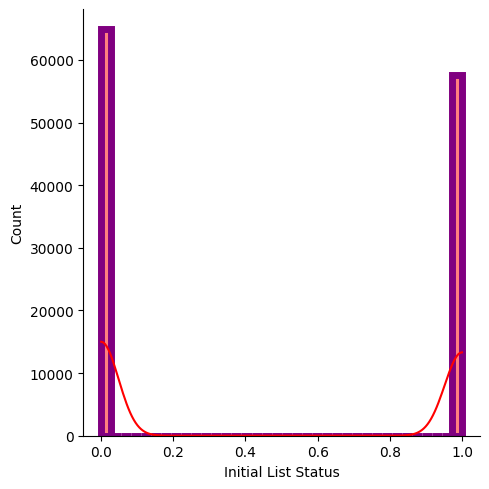

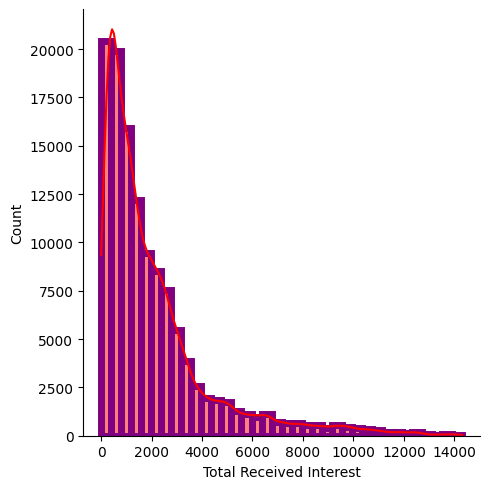

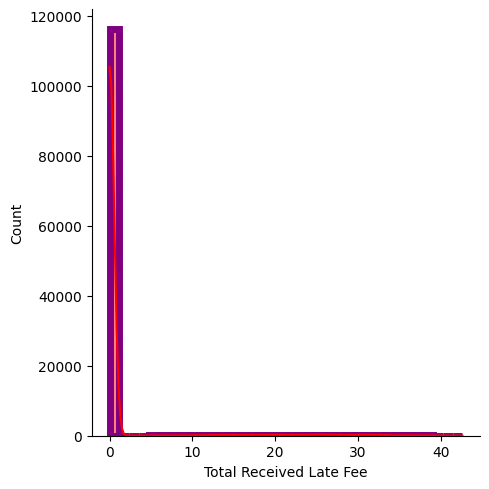

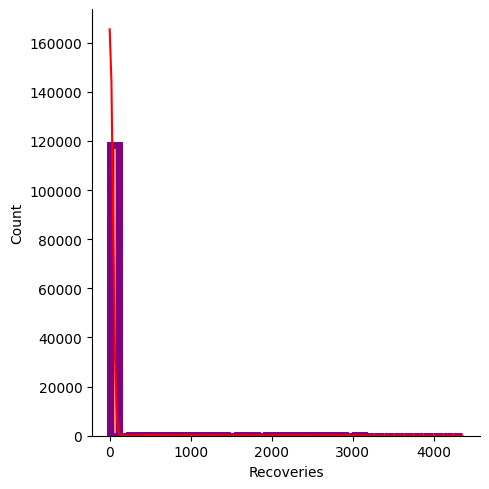

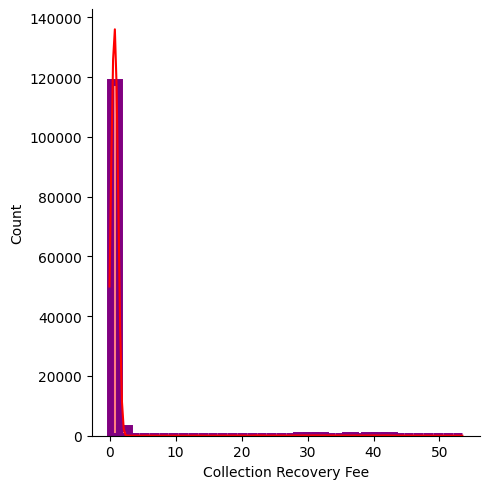

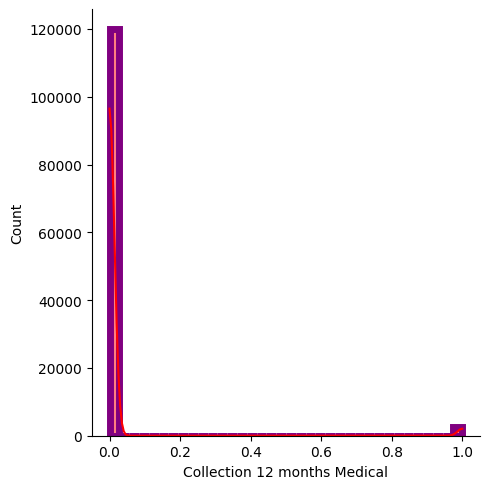

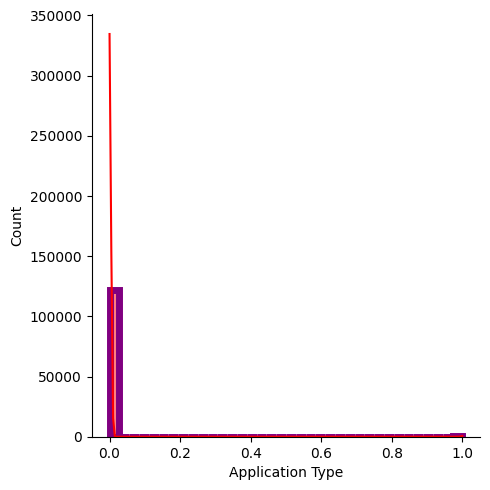

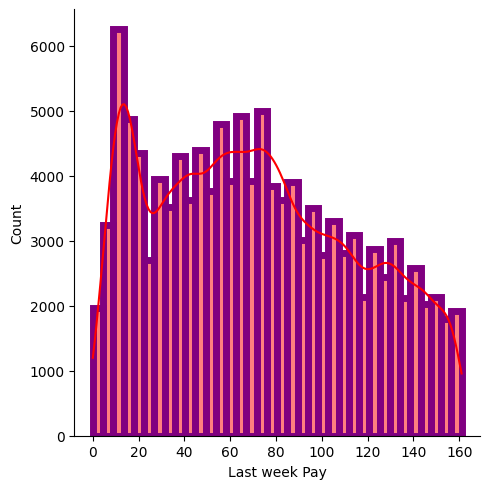

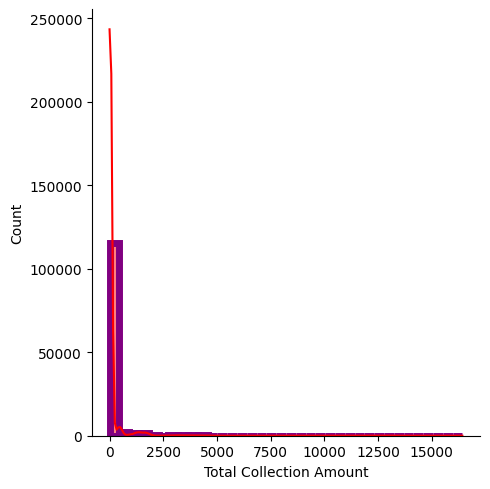

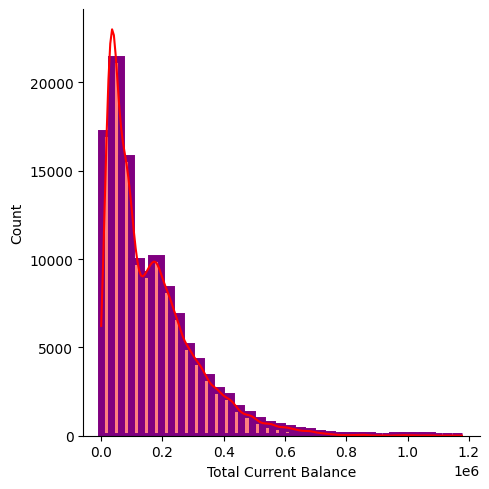

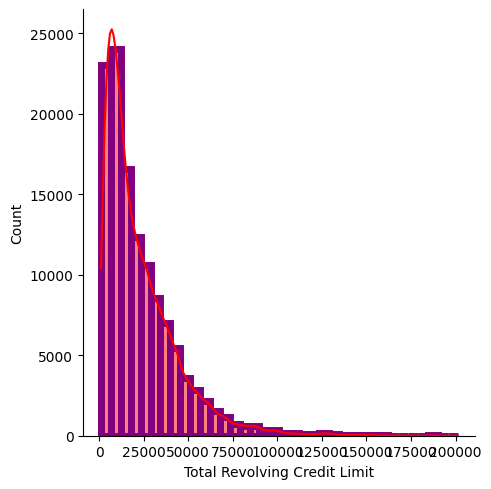

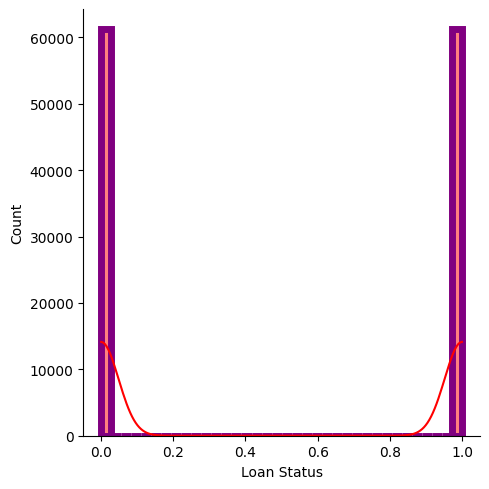

In [ ]:
# Distribution
columns=over_sampled_dataset.columns.tolist()
for column in over_sampled_dataset:
  sns.displot(over_sampled_dataset[columns], kde=True, x=column, color="red", edgecolor="purple", linewidth=5, bins=int(180/5))


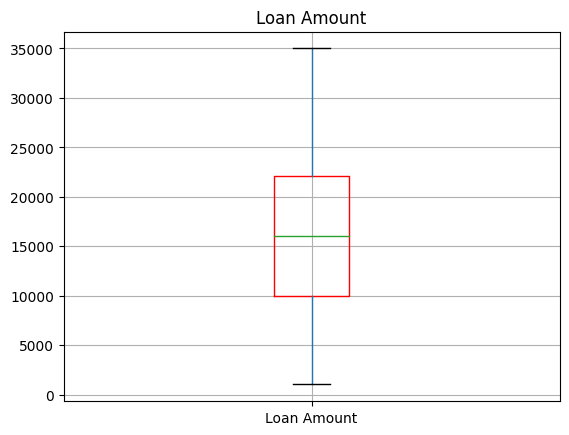

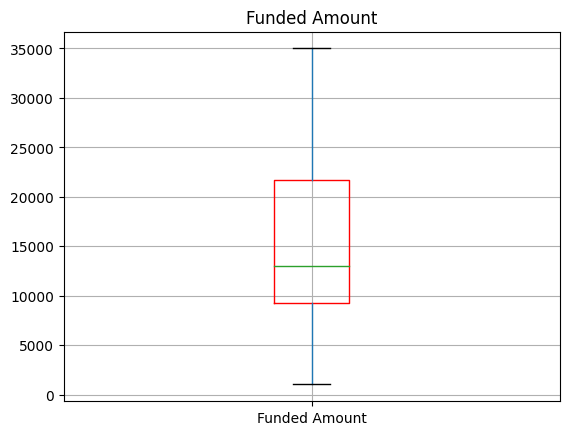

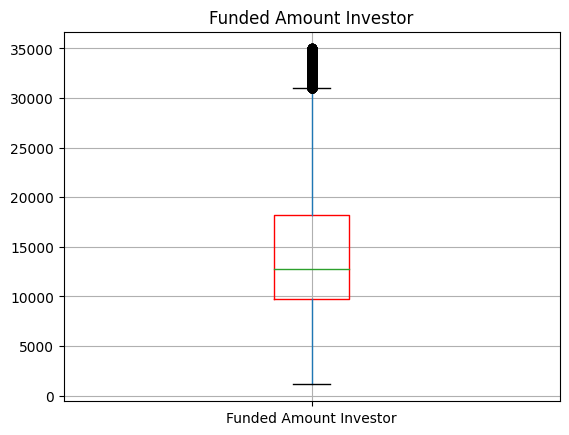

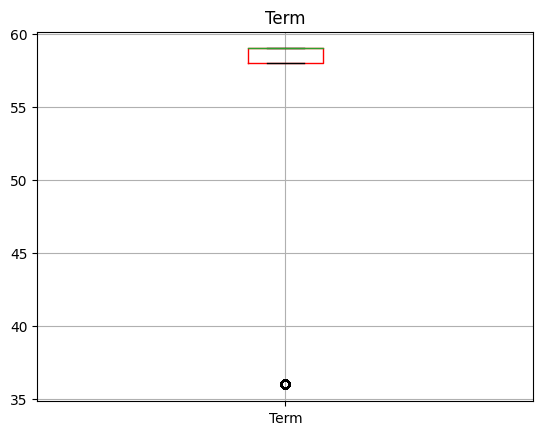

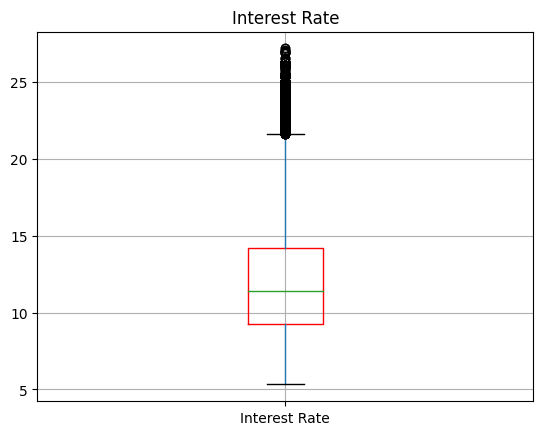

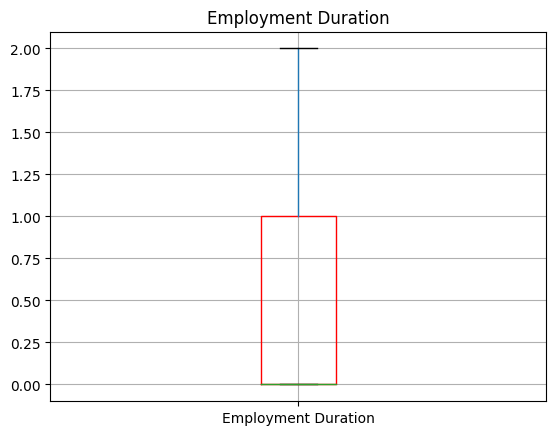

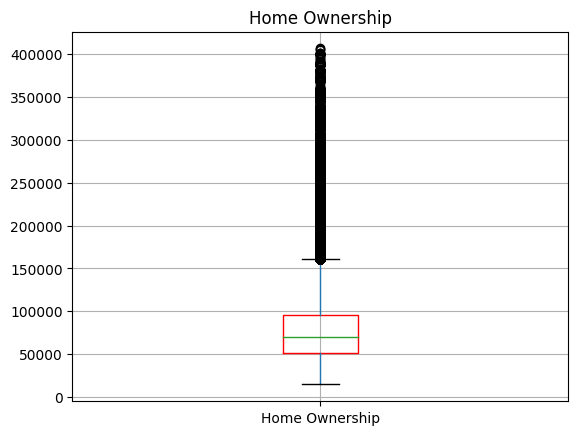

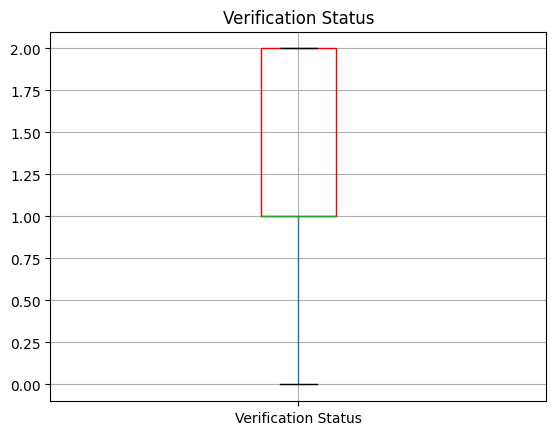

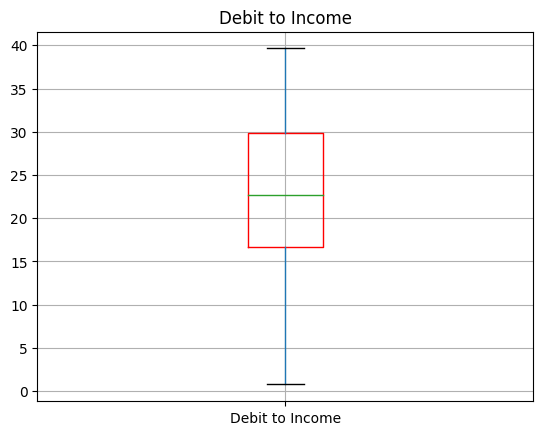

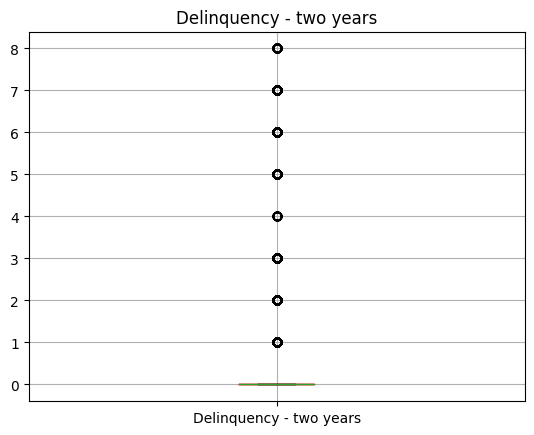

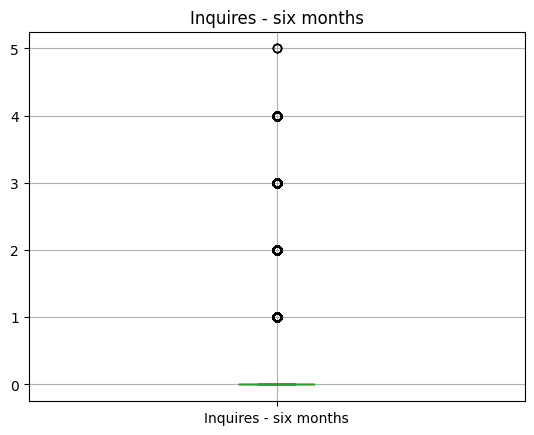

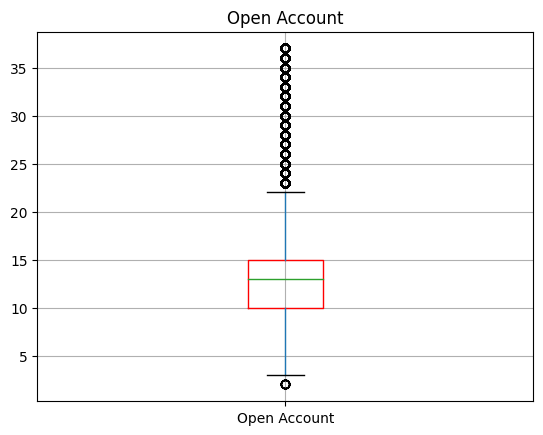

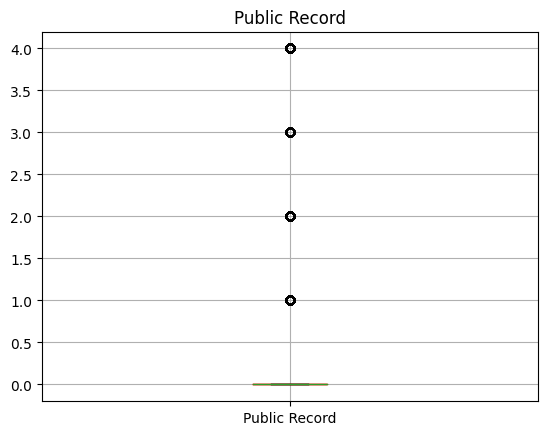

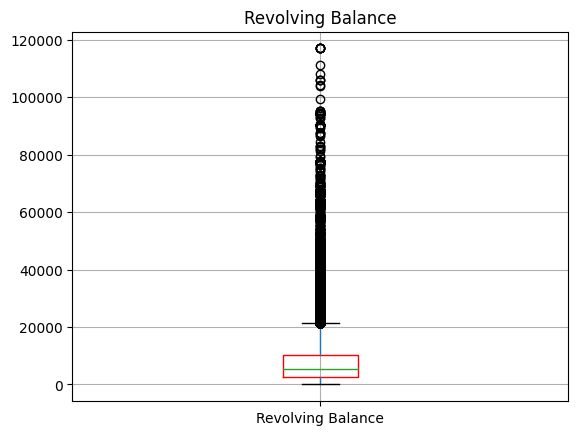

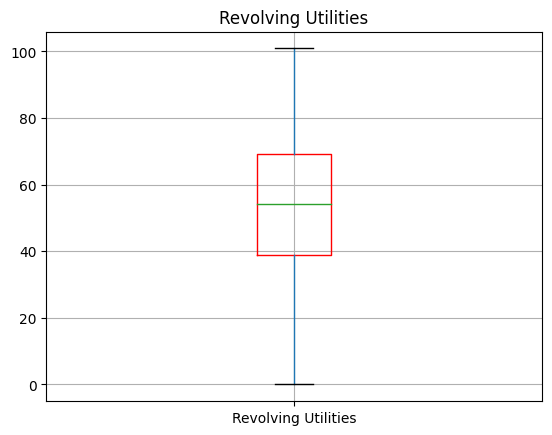

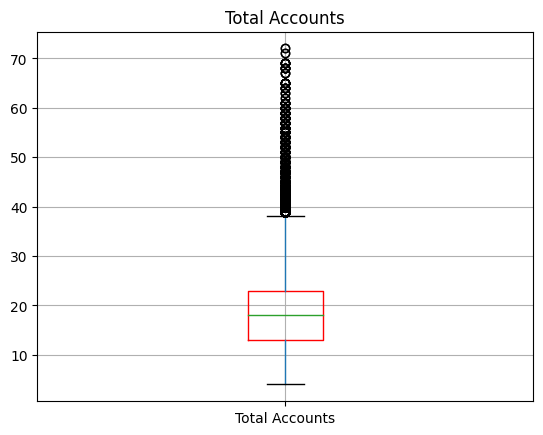

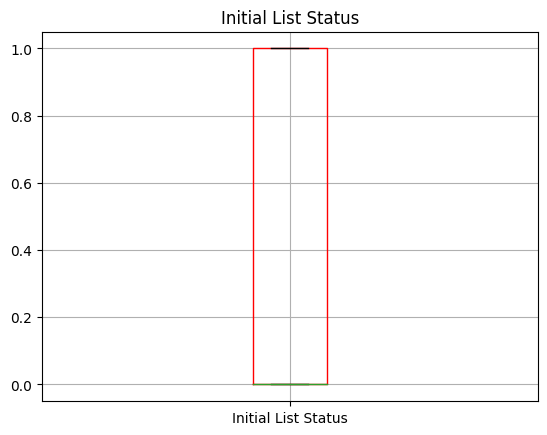

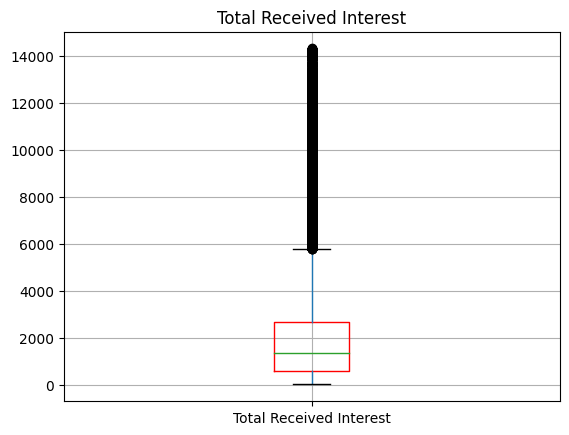

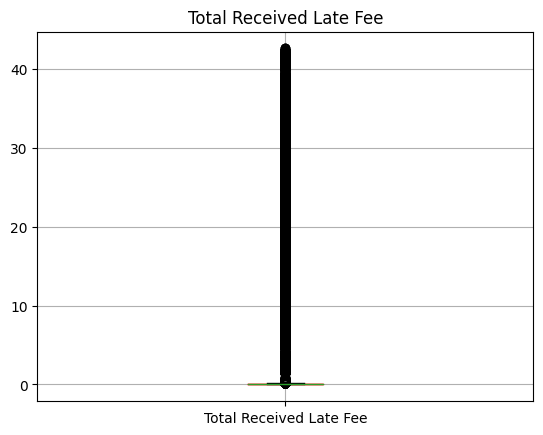

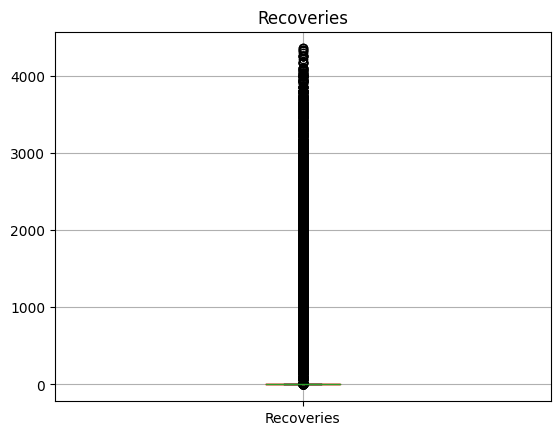

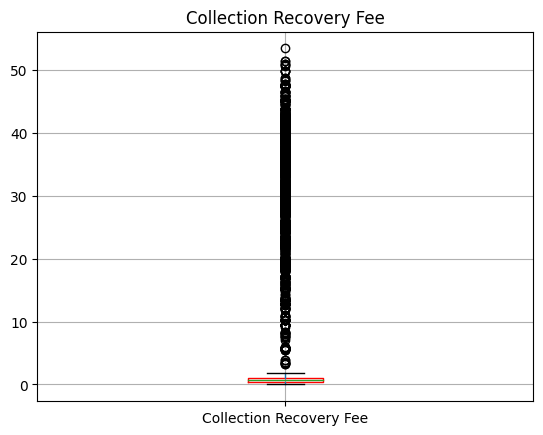

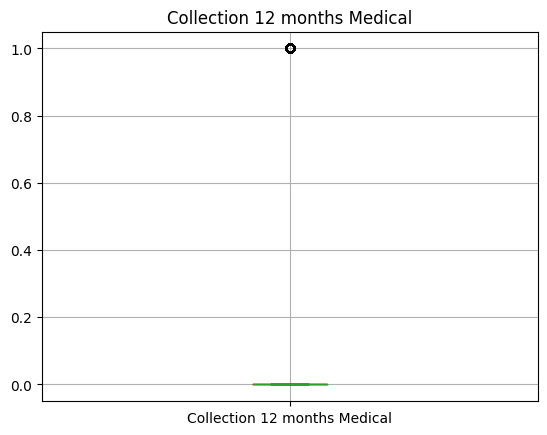

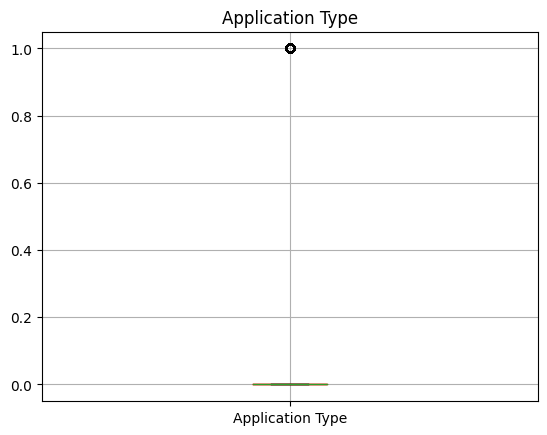

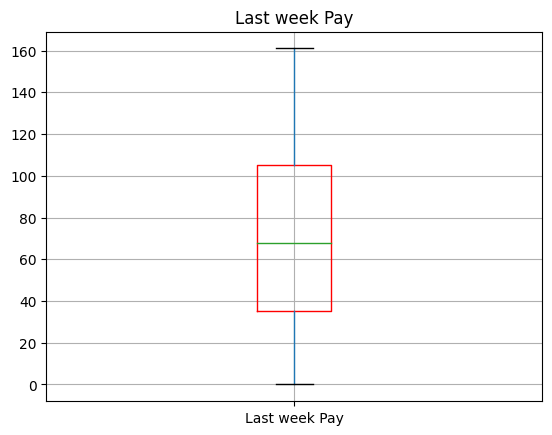

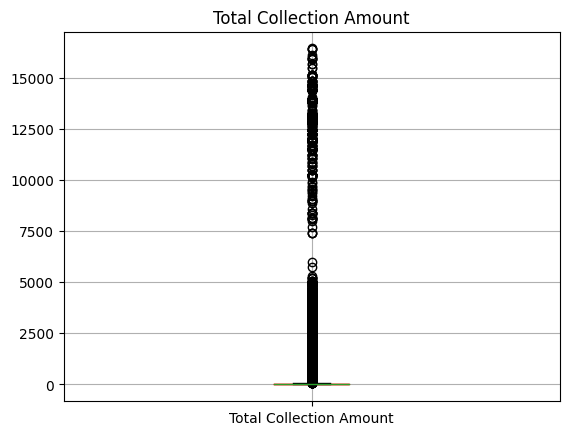

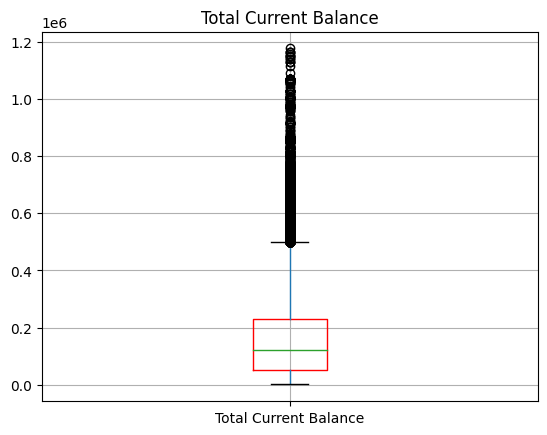

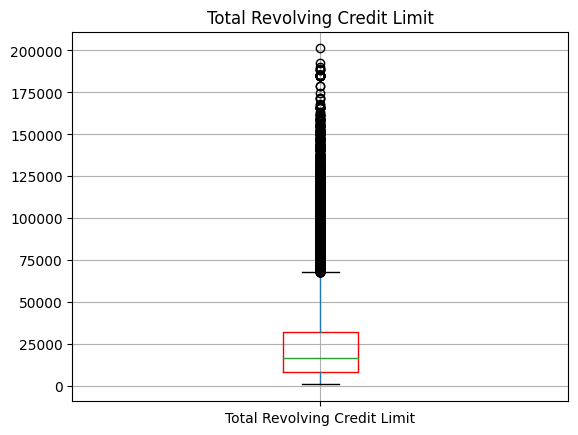

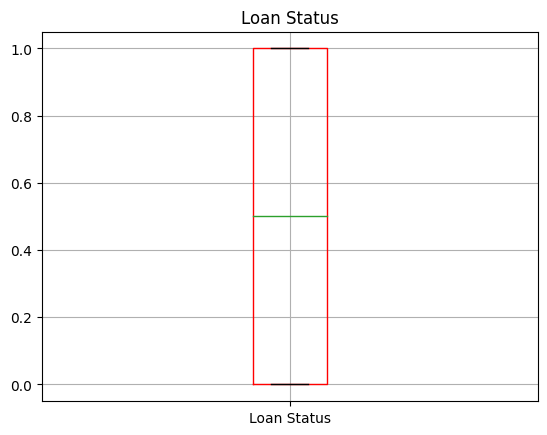

In [ ]:
# BOX PLOT:
for column in dataset:
    over_sampled_dataset[[column]].boxplot(boxprops=dict(color='red'))
    plt.title(column)
    plt.show()

In [ ]:
#Splitting X and y 
X = over_sampled_dataset.iloc[:, :-1]  
y = over_sampled_dataset.iloc[:, -1]  

Removing Outliers through IQR Method

In [ ]:
import numpy as np
cols=["Funded Amount Investor","Interest Rate","Home Ownership","Debit to Income","Open Account","Revolving Balance","Total Accounts",
      "Total Received Interest","Total Current Balance","Total Revolving Credit Limit","Recoveries","Collection Recovery Fee","Total Received Late Fee","Last week Pay","Total Collection Amount"]
print("Skewness of ")
print("Before Removing Outliers")
for column in cols:
  print(column,X[column].skew())
  Q1=X[column].quantile(0.25)
  Q3=X[column].quantile(0.75)
  IQR=Q3-Q1
  upper_limit = Q3 +  IQR*1.5
  lower_limit = Q1 - IQR*1.5
  X[column] = np.where(
        X[column] > upper_limit,
        upper_limit,
        np.where(
            X[column] < lower_limit,
            lower_limit,
            X[column]
        )
    )
#Checking Skewness of the indicated columns in cols after removing outliers
print("After Removing Outliers")
for column in cols:
  print(column,X[column].skew())

Skewness of 
Before Removing Outliers
Funded Amount Investor 0.9752958601650692
Interest Rate 0.5863523208667776
Home Ownership 2.0925974522509154
Debit to Income 0.08003870315948884
Open Account 1.4650772640046472
Revolving Balance 2.979847071627139
Total Accounts 0.7040605649381491
Total Received Interest 2.160466161273613
Total Current Balance 1.4976873963414528
Total Revolving Credit Limit 1.9468936922799767
Recoveries 7.336431927272394
Collection Recovery Fee 10.085090675084203
Total Received Late Fee 4.9420878030036235
Last week Pay 0.2542357361932148
Total Collection Amount 12.79155661472647
After Removing Outliers
Funded Amount Investor 0.8534844907304403
Interest Rate 0.4905902102583894
Home Ownership 0.8789964426802239
Debit to Income 0.08003870315948884
Open Account 0.6617826369738831
Revolving Balance 1.026730614555996
Total Accounts 0.3468086860049454
Total Received Interest 1.1080288488501102
Total Current Balance 0.9932118045125953
Total Revolving Credit Limit 1.04076567

Box Plot after handling outliers

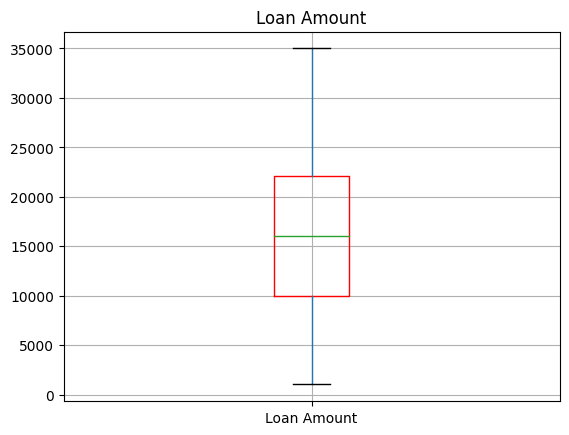

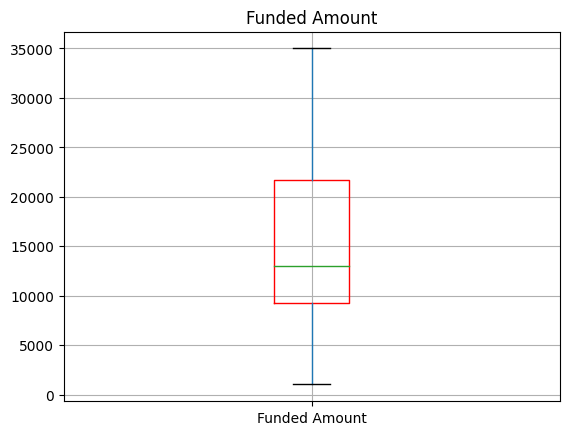

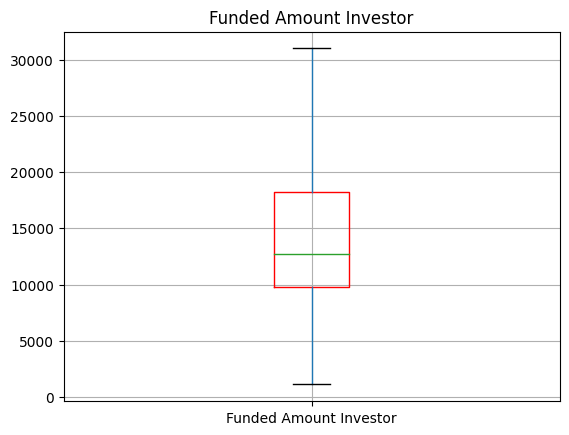

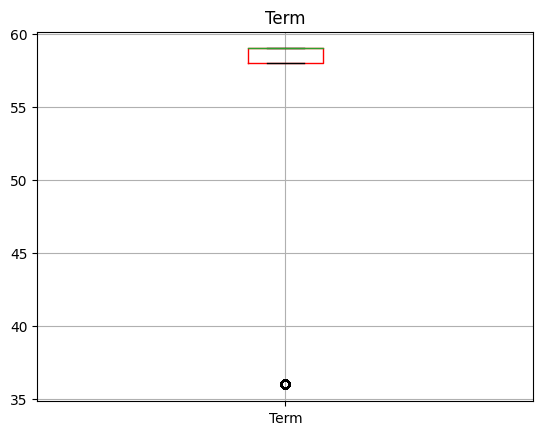

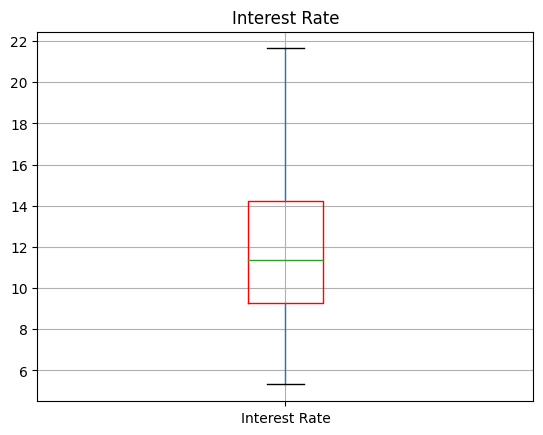

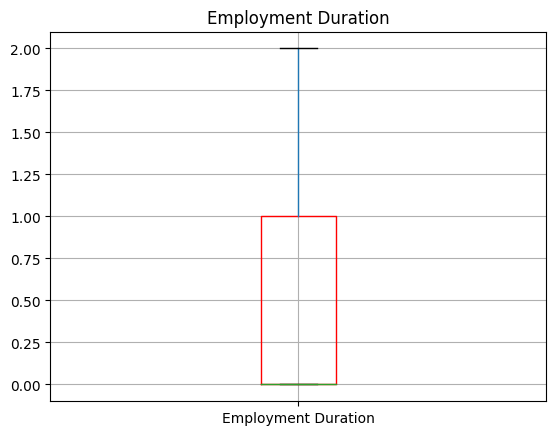

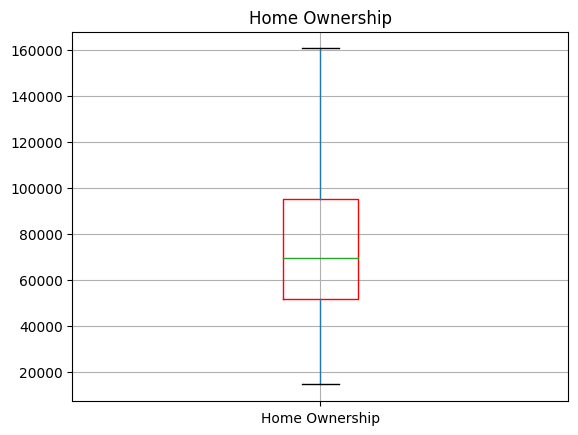

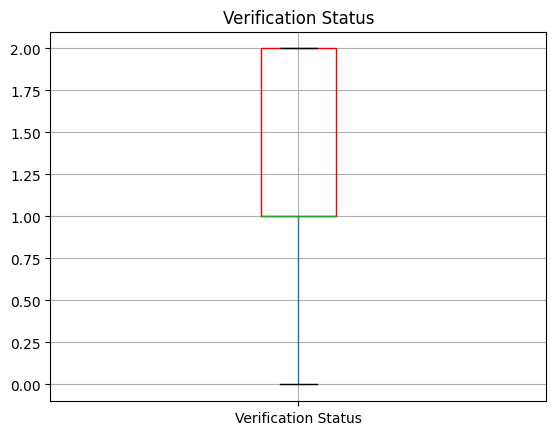

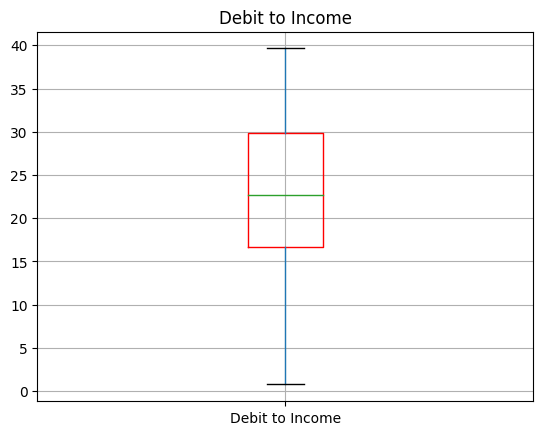

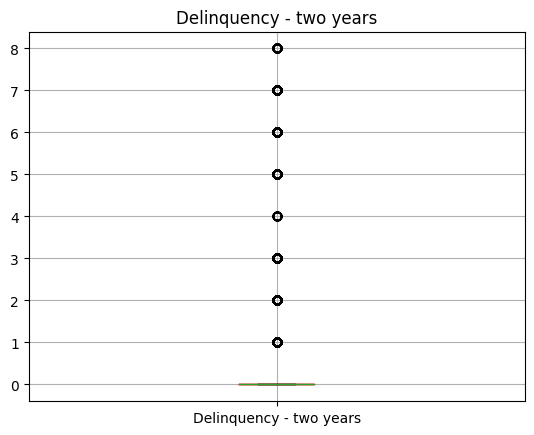

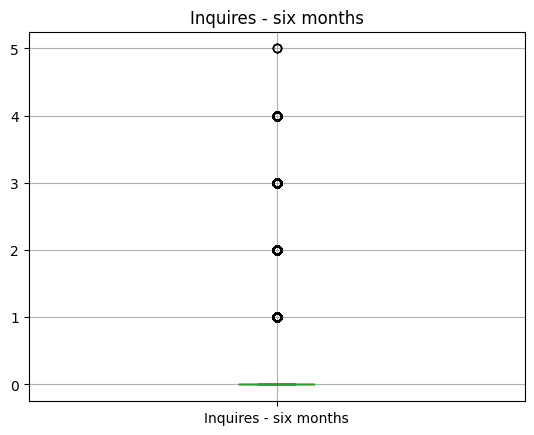

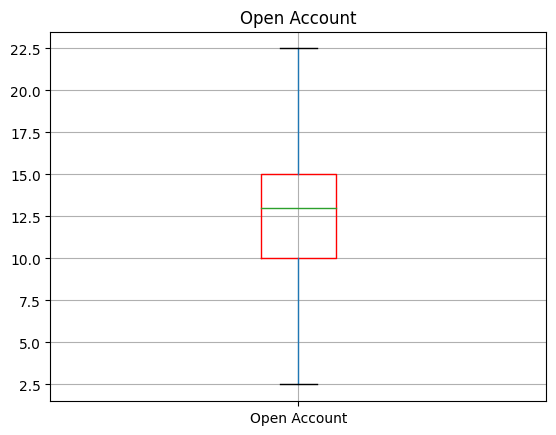

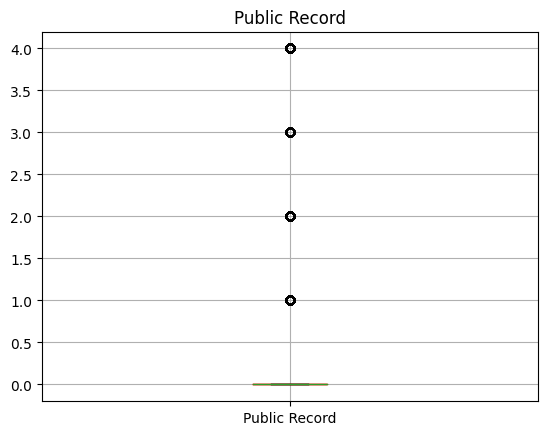

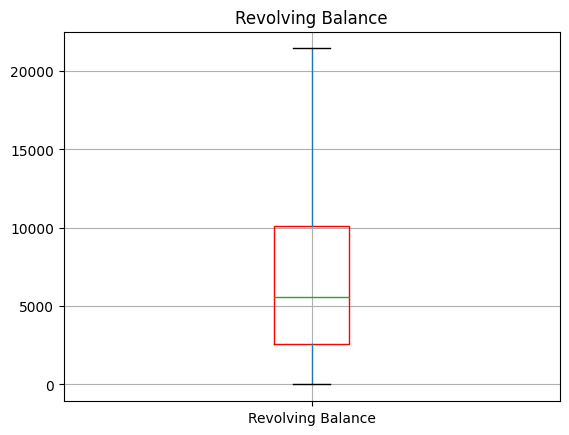

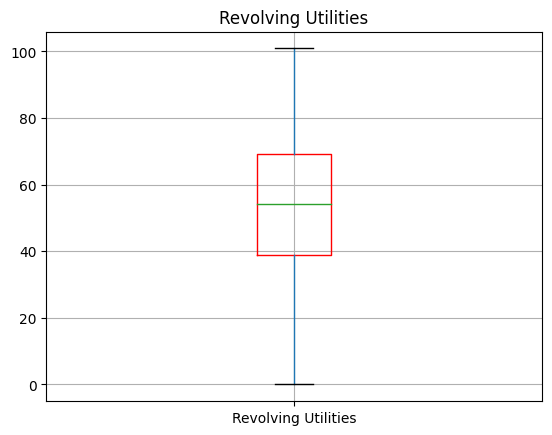

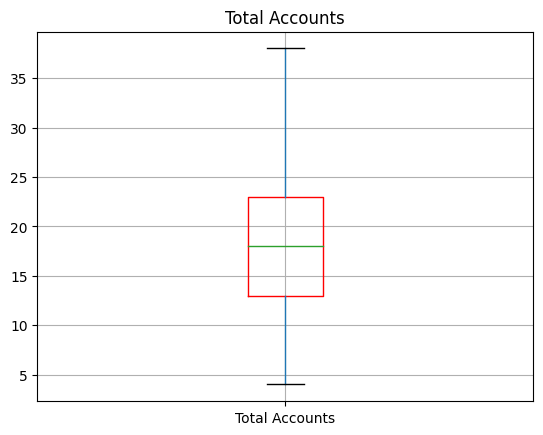

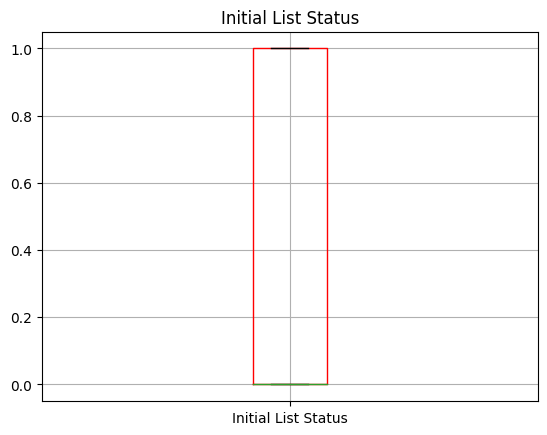

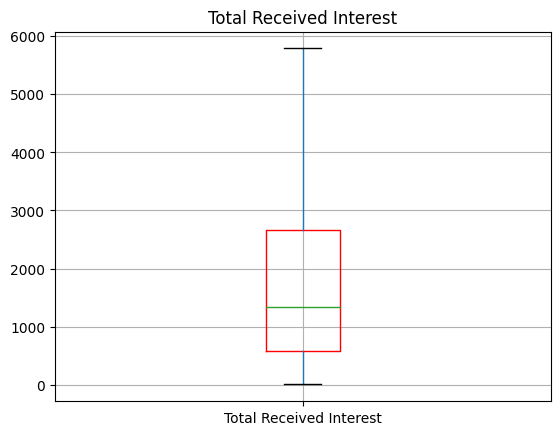

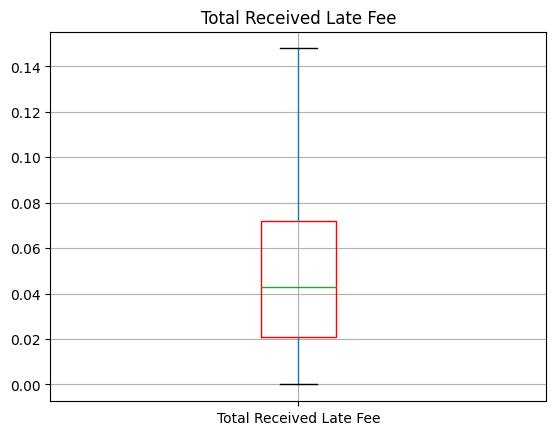

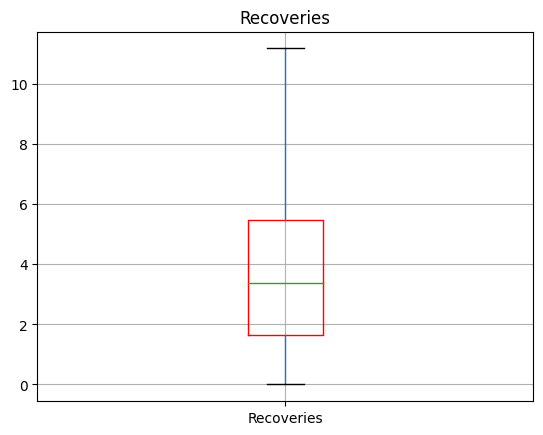

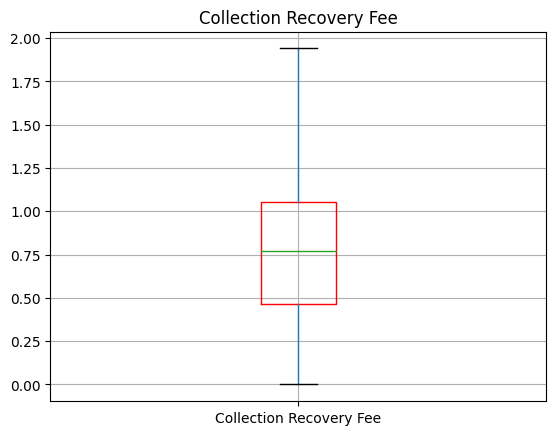

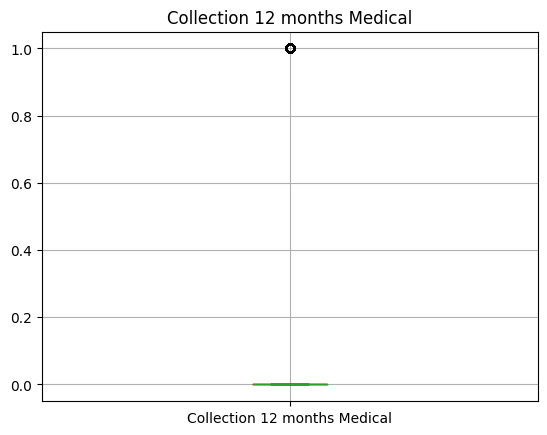

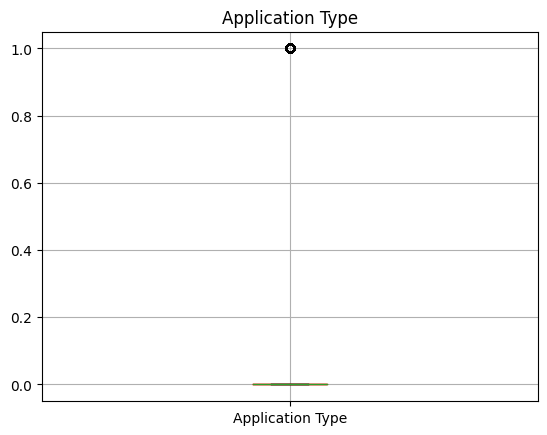

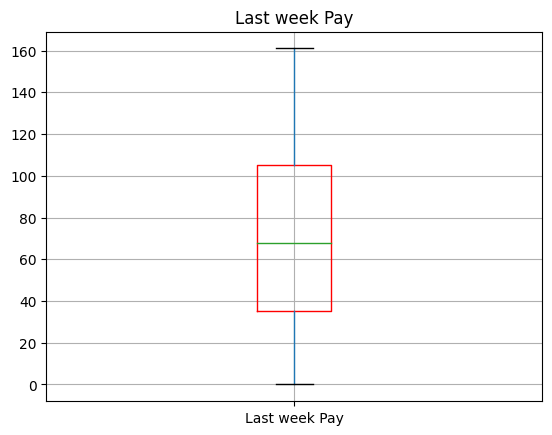

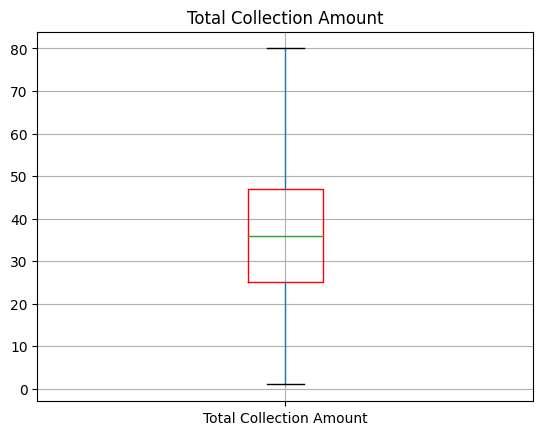

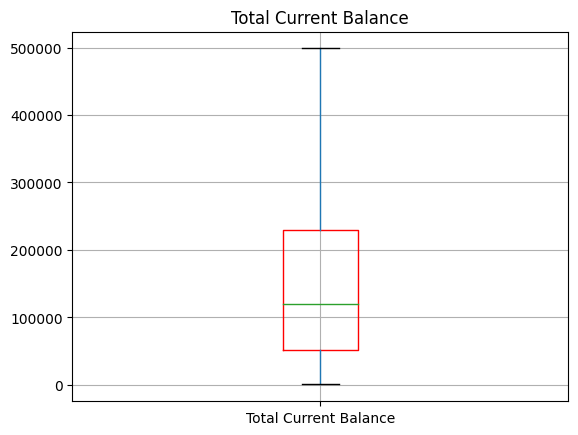

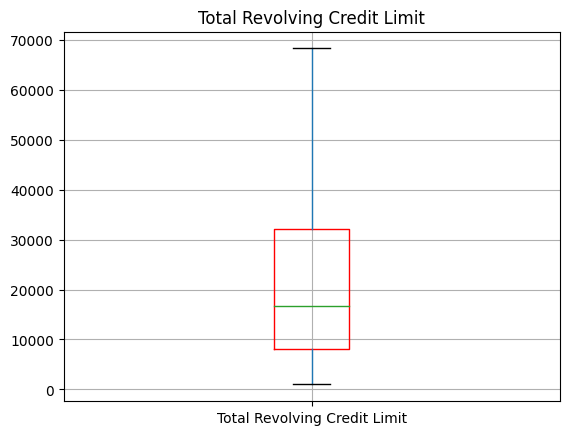

In [ ]:
# BOX PLOT:
for column in X:
    X[[column]].boxplot(boxprops=dict(color='red'))
    plt.title(column)
    plt.show()

Splitting Dataset into Training and Testing Data

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

**Model Selection and Training** 

XGBoost

In [ ]:
dtrain = xgb.DMatrix(xtrain, label=ytrain) #Converting data into DMatrix format, which is the input format required by XGBoost
dtest = xgb.DMatrix(xtest, label=ytest)
params = { #specifying parameters
    "objective": "binary:logistic",
    "max_depth": 3,
    "eta": 0.1,
    "gamma": 0.1,
    "min_child_weight": 1,
    "subsample": 0.5,
    "colsample_bytree": 0.5,
    "verbosity": 0
}
num_of_rounds = 100
model = xgb.train(params, dtrain, num_of_rounds) #training
y_pred = model.predict(dtest) #prediction
y_train_pred = model.predict(dtrain) #prediction
train_acc= accuracy_score(ytrain, y_train_pred.round()) #training
acc = accuracy_score(ytest, y_pred.round()) #calculating accuracy 
print(f"Training Accuracy: {train_acc}")
print(f"Accuracy: {acc}")
print(classification_report(ytest, y_pred.round()))



Training Accuracy: 0.6696196924634563
Accuracy: 0.6446469248291572
              precision    recall  f1-score   support

         0.0       0.64      0.65      0.64      5865
         1.0       0.65      0.64      0.65      5988

    accuracy                           0.64     11853
   macro avg       0.64      0.64      0.64     11853
weighted avg       0.64      0.64      0.64     11853



After balancing the dataset, XGBoost does not provide a good accuracy score.

Logistic Regression, Decision Tree, GaussianNB, KNN, Random Forest

In [ ]:

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=0)


model_list = [rf,dt]
test_acc = []
train_acc=[]
for i in model_list:
    i_model = i.fit(xtrain,ytrain)
    ypred_train = i_model.predict(xtrain)
    ypred_test = i_model.predict(xtest)
    print(i)
    print(classification_report(ytest, ypred_test))
    print(f1_score(ytest, ypred_test, average='macro'))
    print(f1_score(ytest, ypred_test, average='micro'))
    train_acc.append(accuracy_score(ytrain,ypred_train))
    test_acc.append(accuracy_score(ytest,ypred_test))
print("Training Accuracy: ",train_acc)
print("Testing Accuracy: ",test_acc)

RandomForestClassifier(random_state=0)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18255
           1       1.00      1.00      1.00     18479

    accuracy                           1.00     36734
   macro avg       1.00      1.00      1.00     36734
weighted avg       1.00      1.00      1.00     36734

0.9994283050759569
0.9994283225349813
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     18255
           1       0.92      1.00      0.96     18479

    accuracy                           0.96     36734
   macro avg       0.96      0.96      0.96     36734
weighted avg       0.96      0.96      0.96     36734

0.9554085881419168
0.9555180486742527
Training Accuracy:  [1.0, 1.0]
Testing Accuracy:  [0.9994283225349813, 0.9555180486742527]


Training Accuracy of Decision Tree is 1 and Testing Accuracy is 0.962 before the hypertuning, whereas the Training accuracy of Random Forest is 1 and Testing accuracy is 0.999 before hypertuning.

## Hypertuning

Hypertuning of Decision Trees and Random Forest

**Decision Tree Model**


In [ ]:
# Define hyperparameters and their possible values
hyperparameters = {
    'max_depth': [None,36,40,44],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}
Decision_tree = DecisionTreeClassifier()

#Grid Search for Decision Trees:
grid_search_dt = GridSearchCV(Decision_tree, hyperparameters, cv=4)
grid_search_dt.fit(xtrain, ytrain)

# best parameters and score
print('Best Parameters:', grid_search_dt.best_params_)
#validation score it is
print('Best validation Score:', grid_search_dt.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 40, 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'random'}
Best validation Score: 0.9400419854602416


Best Parameters: {'criterion': 'entropy', 'max_depth': 44, 'max_features': 'sqrt', 'min_samples_split': 2, 'splitter': 'random'}


**Random Forest Model**

In [ ]:
hyperparameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [36, 40, 44],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]    
}
random_forest = RandomForestClassifier()
#Grid Search for Random Forest:
grid_search = GridSearchCV(random_forest, hyperparameters, cv=4)
grid_search.fit(xtrain, ytrain)
#Best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best Validation Score:', grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 36, 'max_features': 'sqrt', 'n_estimators': 100}
Best Validation Score: 0.9982281649440657


Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 36, 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
Random_Forest_Model = grid_search.best_estimator_
ypred=Random_Forest_Model.predict(xtest)
print(classification_report(ytest, ypred))  #Classification Report of Test Data after Hyper Tuning for Random Forest

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5865
         1.0       1.00      1.00      1.00      5988

    accuracy                           1.00     11853
   macro avg       1.00      1.00      1.00     11853
weighted avg       1.00      1.00      1.00     11853



In [ ]:
print('The hyperparameters of the final models are:')
print(Random_Forest_Model.get_params())

The hyperparameters of the final models are:
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 36, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
Decision_tree_model = grid_search_dt.best_estimator_
ypred=Decision_tree_model.predict(xtest)
print(classification_report(ytest, ypred)) #Classification Report of Test Data after Hyper Tuning for Decision Trees

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      5865
         1.0       0.93      1.00      0.96      5988

    accuracy                           0.96     11853
   macro avg       0.96      0.96      0.96     11853
weighted avg       0.96      0.96      0.96     11853



In [ ]:
print('The hyperparameters of the final models are:')
print(Decision_tree_model.get_params())

The hyperparameters of the final models are:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 44, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}


Since the accuracy of Random Forest is much better than Decision Tree Model, so we have selected Random Forest as our final Model.

In [3]:
filename = 'DeploymentModel.joblib'
joblib.dump(Random_Forest_Model, filename)

['DeploymentModel.joblib']

In [ ]:

import sqlite3

conn = sqlite3.connect('credit_risk.db')
data['prediction'] = Random_Forest_Model.predict(X)  # final model predictions
data.to_sql('credit_predictions', conn, if_exists='replace', index=False)
conn.close()
print("Predictions exported to credit_risk.db successfully!")


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='prediction', data=data)
plt.title("Predicted High-Risk vs Low-Risk Applicants")
plt.xlabel("Prediction (0 = Low Risk, 1 = High Risk)")
plt.ylabel("Number of Applicants")
plt.show()


Predictions exported to credit_risk.db successfully!

| Loan ID | Funded Amount | Interest Rate | Home Ownership | Loan Status | prediction |
| ------- | ------------- | ------------- | -------------- | ----------- | ---------- |
| 1001    | 15000         | 0.13          | RENT           | 0           | 0          |
| 1002    | 25000         | 0.15          | MORTGAGE       | 1           | 1          |
| 1003    | 12000         | 0.10          | OWN            | 0           | 0          |
| 1004    | 18000         | 0.12          | RENT           | 1           | 1          |
| 1005    | 22000         | 0.14          | RENT           | 0           | 0          |


![Predicted High-Risk vs Low-Risk Applicants](placeholder.png)

- X-axis: Prediction (0 = Low Risk, 1 = High Risk)
- Y-axis: Number of Applicants (Low Risk ~1500, High Risk ~500)
